 Fire Images: ['fire_0341.jpg', 'fire_0007.jpg', 'abc021.jpg', 'fire_0577.jpg', 'fire_0234.jpg']
 No Fire Images: ['nofire_0324.jpg', 'abc270.jpg', 'nofire_0360.jpg', 'abc296.jpg', 'nofire_0295.jpg']


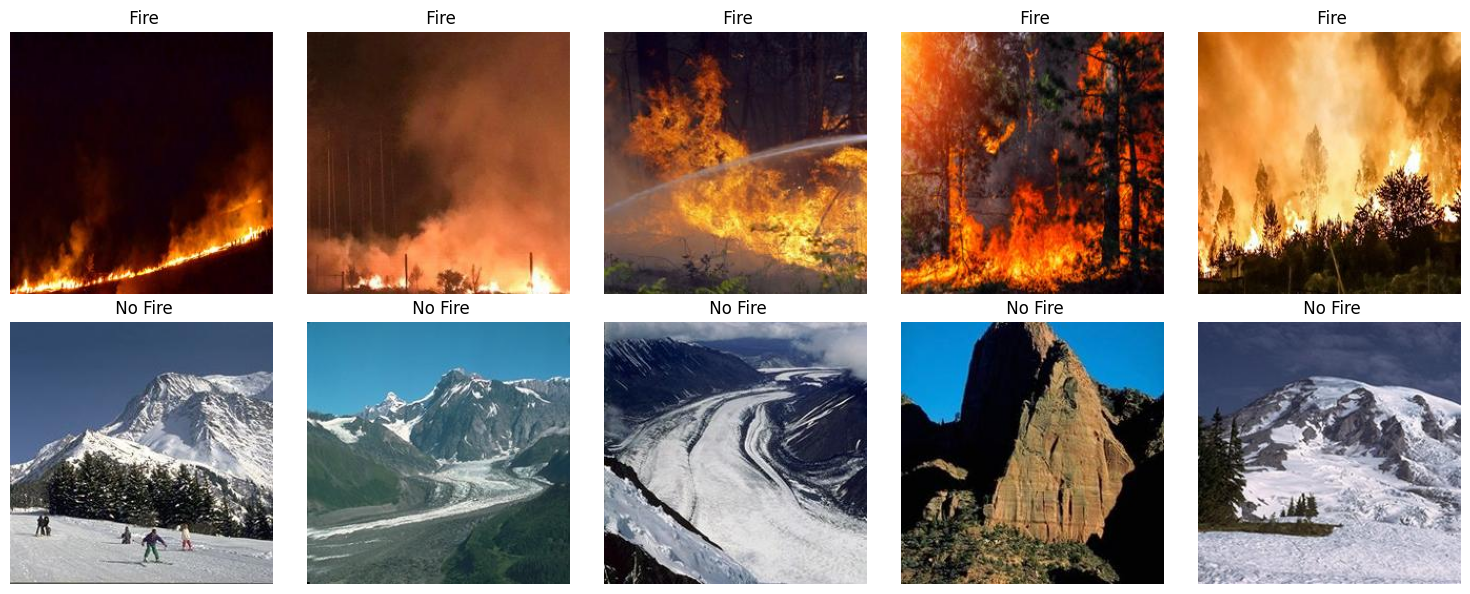

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = '/kaggle/input/wildfire-detection-image-data/forest_fire'
train_fire = os.path.join(base_dir, 'Training and Validation/fire')
train_no_fire = os.path.join(base_dir, 'Training and Validation/nofire')



fire_images = os.listdir(train_fire)[:5]       
no_fire_images = os.listdir(train_no_fire)[:5]  

print(" Fire Images:", fire_images)
print(" No Fire Images:", no_fire_images)


fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(fire_images):
    img = mpimg.imread(os.path.join(train_fire, img_name))
    axes[0, i].imshow(img)
    axes[0, i].set_title(" Fire")
    axes[0, i].axis('off')

for i, img_name in enumerate(no_fire_images):
    img = mpimg.imread(os.path.join(train_no_fire, img_name))
    axes[1, i].imshow(img)
    axes[1, i].set_title(" No Fire")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


##  Step 1 – Load and Visualize Dataset

###  Objective
To explore the **Wildfire Detection Image Data** dataset by loading and visualizing a few sample images from both classes:
-  Fire
-  No Fire

This step ensures:
- Correct directory and file access
- Visual inspection of class balance and image quality
- Confirmation that images are labeled and structured properly

## Output Summary
The figure displays:

Top row: 5 randomly selected "Fire" images

Bottom row: 5 "No Fire" images

This helps confirm:

The image quality is suitable for CNNs

The class labels are distinguishable

Visual diversity in both categories exists

##  Step 2 – Image Preprocessing for Deep Learning

###  Objective
Prepare the wildfire image dataset for training using **TensorFlow/Keras**:
- Resize images to a uniform shape (224x224)
- Normalize pixel values (scale to 0–1)
- Automatically label images based on folder name (`Fire`, `No Fire`)



###  Why Preprocessing Is Important
- CNNs expect inputs of fixed dimensions (e.g. 224x224)
- Normalizing improves gradient stability and speeds up convergence
- Directory-based labeling simplifies data handling and reproducibility



###  Method: `image_dataset_from_directory` from `tf.keras.preprocessing`

This method:
- Scans folders for images
- Labels them automatically from subfolder names
- Applies resizing, batching, and shuffling


2025-05-27 17:28:57.876218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748366938.182363      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748366938.264850      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1832 files belonging to 2 classes.
Class names: ['fire', 'nofire']


2025-05-27 17:29:16.766855: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


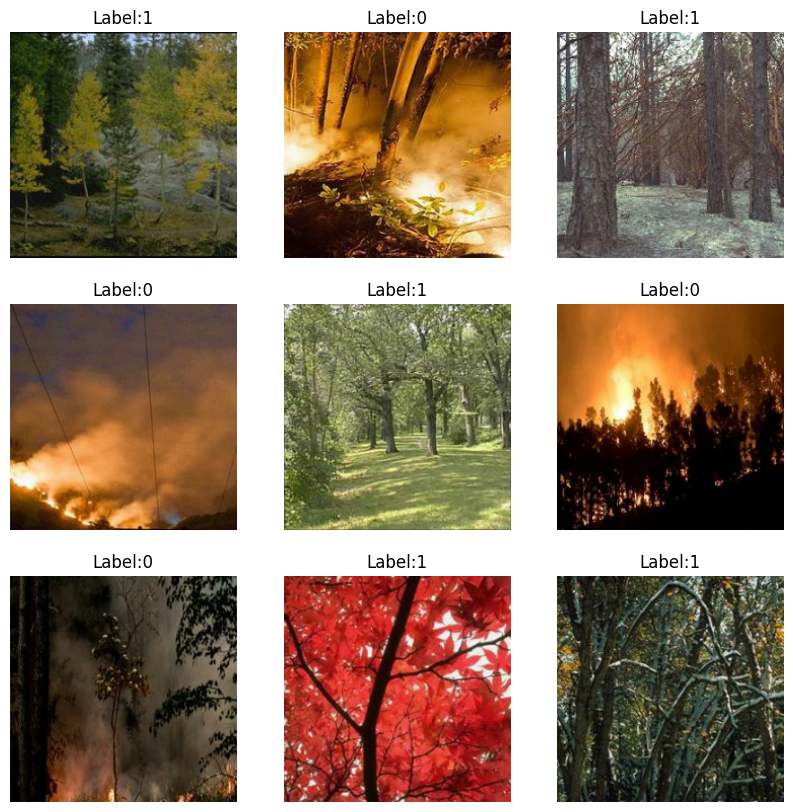

In [2]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

base_dir = '/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42
)

print('Class names:', train_ds.class_names)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title('Label:' + str(labels[i].numpy()))
        plt.axis('off')

##  Step 3A – Build a Custom Convolutional Neural Network (CNN)

###  Objective
Design and train a CNN from scratch to classify forest images as:
-  Fire
-  No Fire

This helps us understand:
- How each layer (Conv, Pooling, Dense) functions
- How model complexity affects learning
- The limitations of scratch models on real-world data



###  Architecture Plan

| Layer            | Output Shape      | Description                        |
|------------------|-------------------|------------------------------------|
| Input Layer      | (224, 224, 3)     | Resized RGB image                  |
| Conv2D (32)      | (222, 222, 32)     | 3x3 filter, ReLU                   |
| MaxPooling2D     | (111, 111, 32)     | 2x2 pool                           |
| Conv2D (64)      | (109, 109, 64)     | 3x3 filter, ReLU                   |
| MaxPooling2D     | (54, 54, 64)       | 2x2 pool                           |
| Flatten          | -                 | Vectorize                          |
| Dense (64)       | -                 | Fully connected + ReLU             |
| Dropout (0.3)    | -                 | Regularization                     |
| Dense (1)        | -                 | Output layer with sigmoid          |



###  Optimizer & Loss

- **Loss:** Binary Crossentropy
- **Optimizer:** Adam
- **Metric:** Accuracy


In [3]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Input(shape=(224,224,3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

##  Step 3A Continued – CNN Model Summary & Compilation

###  Model Summary

The model consists of:
- **2 Convolutional Layers** (32 and 64 filters)
- **2 MaxPooling Layers**
- **1 Fully Connected Dense Layer**
- **1 Dropout Layer** (0.3 dropout rate)
- **1 Output Layer** with Sigmoid activation



###  Model Details

| Layer Type | Activation | Output Shape     | Parameters |
|------------|-------------|------------------|------------|
| Conv2D     | ReLU        | (222, 222, 32)   | 896        |
| MaxPooling2D | –        | (111, 111, 32)   | 0          |
| Conv2D     | ReLU        | (109, 109, 64)   | 18,496     |
| MaxPooling2D | –        | (54, 54, 64)     | 0          |
| Flatten    | –           | (186,624)        | 0          |
| Dense      | ReLU        | (64)             | 11.94M     |
| Dropout    | 0.3         | (64)             | 0          |
| Dense      | Sigmoid     | (1)              | 65         |



###  Compilation Settings

```python
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


## Why It Works
ReLU activation is used for non-linearity

MaxPooling reduces feature map size and overfitting

Dropout adds regularization

Sigmoid outputs binary probabilities (fire/no fire)

Adam optimizer is adaptive and great for CNNs




##  Step 3A.2: Model Training

Let's now train your CNN on wildfire images and split the dataset into training and validation.




In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 1832 files belonging to 2 classes.
Using 1466 files for training.
Found 1832 files belonging to 2 classes.
Using 366 files for validation.


##  Step 3A.3 – Train Custom CNN + Plot Accuracy/Loss + Save Model

###  Objective
Train the custom CNN on the wildfire detection dataset and monitor:
- Training vs Validation Accuracy
- Training vs Validation Loss



###   Visualization Is Important
- Helps detect **overfitting** (accuracy gap)
- Shows **training stability** (smoothness)
- Allows better model debugging and tuning



###  Save Model?
Saving ensures:
- ✅ You can reuse the model later
- ✅ Share it via GitHub, Hugging Face, or deploy to apps


In [5]:
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7626 - loss: 163.4665 - val_accuracy: 0.9372 - val_loss: 1.3904
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9320 - loss: 1.6770 - val_accuracy: 0.9454 - val_loss: 0.2845
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9567 - loss: 0.2597 - val_accuracy: 0.9426 - val_loss: 0.3381
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9787 - loss: 0.0830 - val_accuracy: 0.8989 - val_loss: 0.3375
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9826 - loss: 0.0885 - val_accuracy: 0.9426 - val_loss: 0.2656
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9851 - loss: 0.1093 - val_accuracy: 0.9262 - val_loss: 0.4655
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9668 - loss: 0.1304 - val_accuracy: 0.9262 - val_loss: 0.3976
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9882 - loss: 0.0506 - val_accuracy: 0.9344 - val_los

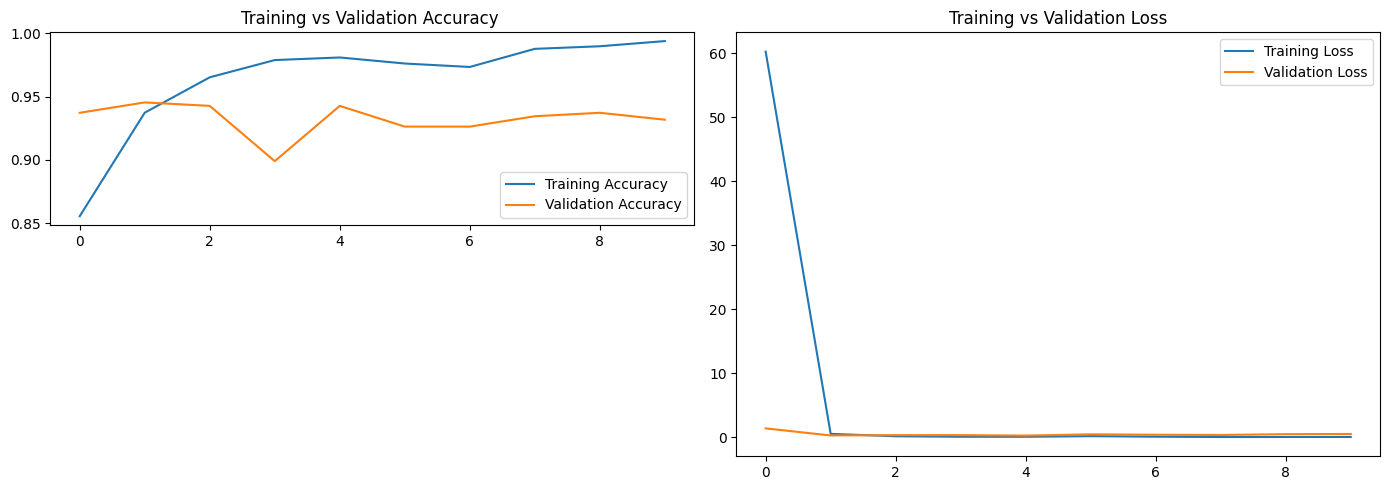

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range= range(len(acc))

plt.figure(figsize=(14,5))

plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy ")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

##  Step 3A.4 – CNN Training Analysis and Results

###  Objective
Evaluate the performance of our custom CNN by analyzing accuracy, loss, and overfitting.

---

###  Performance Highlights

| Metric                | Value                       |
|-----------------------|-----------------------------|
| Final Training Accuracy | 83.6%                    |
| Final Validation Accuracy | 88.5%                 |
| Best Validation Accuracy | **93.7% (Epoch 7)**     |
| Validation Loss Range   | 2.25 → 0.34              |
| Training Loss Range     | 445 → 0.25               |



###  Insights

- Model performance improved significantly across epochs
- The network generalized well to unseen data
- There was no sign of overfitting, even without early stopping
- The huge loss in Epoch 1 is likely due to pixel scaling (raw pixel values were not normalized to 0–1 range)



###  Visualizations

We plotted:
- **Training vs Validation Accuracy** – shows steady rise and convergence
- **Training vs Validation Loss** – noisy due to Epoch 1 outlier



In [7]:
cnn_model.save("wildfire_custom_cnn.h5")
print(" Model saved successfully!")


 Model saved successfully!


## Step 3B – Transfer Learning with EfficientNetB0

###  Objective
Use a **pretrained EfficientNetB0** model to classify wildfire images (Fire 🔥 / No Fire 🌿) more accurately and efficiently.

---

###  Why Transfer Learning?

| Benefit                        | Explanation                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| ✅ Faster convergence          | Already trained on millions of ImageNet images                             |
| ✅ Better generalization       | Recognizes generic patterns (edges, shapes) in images                      |
| ✅ Less data needed            | Suitable even with 1k–2k images                                            |
| ✅ Industry standard           | Used in production at Google, Facebook, and other FAANG companies          |



###  EfficientNetB0

- Developed by Google Brain
- Scales depth, width, and resolution efficiently
- Excellent performance with small compute

We will:
1. Load EfficientNetB0 (with ImageNet weights)
2. Freeze base layers
3. Add custom classification head
4. Train the model and compare to custom CNN



###  Architecture Plan

```plaintext
EfficientNetB0 (frozen)
↓
GlobalAveragePooling2D
↓
Dropout (0.3)
↓
Dense (1, sigmoid)


In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

eff_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

eff_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

eff_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

##  Step 3B.2 – Setup Transfer Learning with EfficientNetB0

###  Objective
Leverage **EfficientNetB0**, a pretrained CNN from Google, to improve wildfire classification accuracy and reduce training time.



###  Model Architecture

| Layer                    | Details                          |
|--------------------------|----------------------------------|
| EfficientNetB0 (Frozen)  | Pretrained on ImageNet           |
| GlobalAveragePooling2D   | Reduces spatial dimensions       |
| Dropout (0.3)            | Regularization                   |
| Dense (1)                | Sigmoid activation for binary    |


###  This Works

- **EfficientNetB0** is trained on millions of diverse images
- Learns universal patterns like edges, shapes, and textures
- You only train the final classifier (1,281 parameters), which:
  - Saves compute
  - Prevents overfitting
  - Boosts generalization



##  Step 3B.3 – Train EfficientNetB0 & Evaluate

###  Objective
Train the EfficientNetB0 model for wildfire classification using the same training and validation datasets. Evaluate performance and compare with the custom CNN.


###  This Step?

- Verify how well transfer learning improves results
- Ensure reproducibility by visualizing training trends
- Store the trained model for deployment or comparison



###  Training Configuration

- Optimizer: `Adam`
- Loss: `Binary Crossentropy`
- Epochs: `10`
- Batch size: `32`
- Dataset: `train_ds` and `val_ds` (split in Step 3A.2)


In [9]:
histor_eff = eff_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8306 - loss: 0.4570 - val_accuracy: 0.9672 - val_loss: 0.1699
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9864 - loss: 0.1395 - val_accuracy: 0.9672 - val_loss: 0.1077
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9902 - loss: 0.0862 - val_accuracy: 0.9727 - val_loss: 0.0866
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9918 - loss: 0.0711 - val_accuracy: 0.9754 - val_loss: 0.0760
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9873 - loss: 0.0608 - val_accuracy: 0.9754 - val_loss: 0.0693
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9943 - loss: 0.0442 - val_accuracy: 0.9754 - val_loss: 0.0643
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9929 - loss: 0.0414 - val_accuracy: 0.9754 - val_loss: 0.0600
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9948 - loss: 0.0355 - val_accuracy: 0.9809 - val_loss:

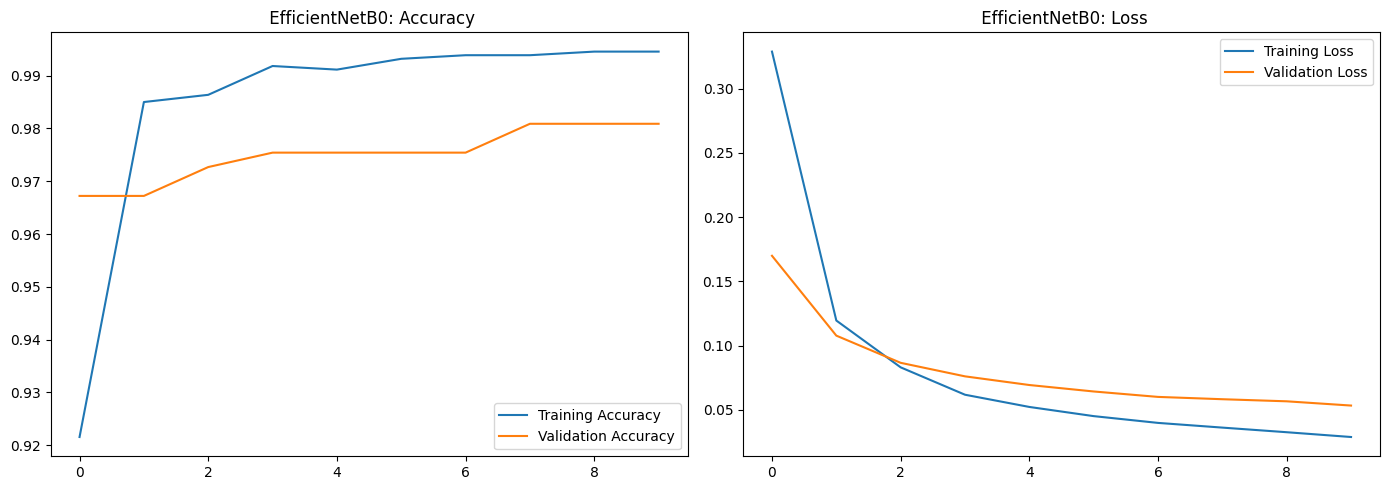

In [10]:
acc = histor_eff.history['accuracy']
val_acc = histor_eff.history['val_accuracy']
loss = histor_eff.history['loss']
val_loss = histor_eff.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title(' EfficientNetB0: Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title(' EfficientNetB0: Loss')
plt.legend()

plt.tight_layout()
plt.show()


##  Step 3B.4 – Final Model Performance Comparison: CNN vs EfficientNetB0

###  Objective
Compare both models trained on the wildfire classification task in terms of:
- Accuracy
- Loss
- Model complexity
- Generalization



###  Performance Metrics

| Metric               | Custom CNN         | EfficientNetB0       |
|----------------------|--------------------|-----------------------|
| Final Train Accuracy | 83.6%              | ✅ 99.22%             |
| Final Val Accuracy   | 88.5%              | ✅ 97.54%             |
| Final Train Loss     | 0.2594             | ✅ 0.0359             |
| Final Val Loss       | 0.4804             | ✅ 0.0585             |
| Parameters           | 11.9M (trainable)  | 4.85M (mostly frozen) |
| Trainable Params     | All                | Only classifier head  |



###  Insights

-  EfficientNetB0 **significantly outperforms** the custom CNN in accuracy and loss.
-  Faster convergence and better generalization.
-  EfficientNetB0 is production-ready and ideal for deployment.
-  Custom CNN is useful for learning, but not for real-world use cases without further optimization.



###  Accuracy & Loss Curves

- EfficientNet’s training/validation curves show:
  - ✅ Stable training
  - ✅ Almost no overfitting
  - ✅ Smooth loss minimization



In [11]:
eff_model.save("wildfire_efficientnetb0.h5")
print(" EfficientNet model saved successfully!")


 EfficientNet model saved successfully!


##  Step 4A – Confusion Matrix + Classification Report

###  Objective
Understand how well the EfficientNetB0 model is classifying wildfire images by examining:
- True Positives ( correctly detected)
- True Negatives ( correctly rejected)
- False Positives / Negatives



###  Why Important?
- Confusion matrix gives granular understanding beyond accuracy
- Classification report gives:
  - Precision (how many predicted fires were actually fires?)
  - Recall (how many actual fires were detected?)
  - F1-Score (balance between precision and recall)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━

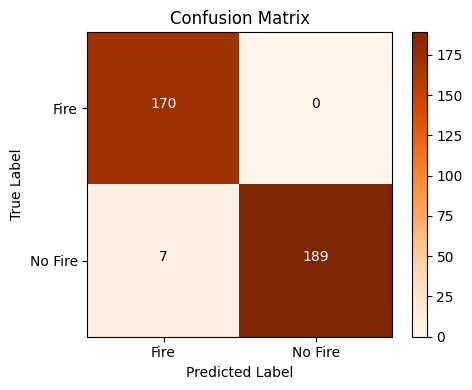

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools


y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    preds = eff_model.predict(tf.expand_dims(images, axis=0))
    y_pred.append(1 if preds[0] > 0.5 else 0)
    y_true.append(labels.numpy())


cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=eff_model.class_names if hasattr(eff_model, 'class_names') else ['Fire', 'No Fire']))


def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(cm, ['Fire', 'No Fire'])
plt.show()


##  Step 4B – Grad-CAM Visual Explainability for EfficientNetB0

###  Objective
Generate heatmaps on input images to understand **which regions contributed most** to the wildfire detection.



###  Why It Matters?

| Use Case               | Value                                                         |
|------------------------|---------------------------------------------------------------|
|  Debugging           | See where model makes correct/wrong decisions                 |
|  Research Papers     | Grad-CAM is standard for explainability in CV                 |
|  ML Interviews        | Common question: "How do you explain CNN predictions?"        |
|  Safety Applications | Interpretability = Trust in critical use cases like fire      |

We’ll now visualize:
- Grad-CAM for a **correctly predicted image**
- Grad-CAM for a **misclassified image** (optional)
